In [16]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
#https://elitedatascience.com/keras-tutorial-deep-learning-in-python

# Importar Dataset de imagens de caracteres

In [17]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# Analisar Dataset

In [18]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [19]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [20]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [21]:
y_train[0]

5

# Plotar item

In [22]:
#X_train[0, :, :]

In [23]:
plt.rcParams['figure.figsize'] = 3,3

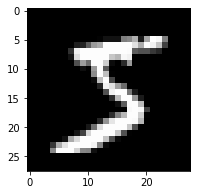

In [24]:
plt.imshow(X_train[0, :, :],cmap='gray')

In [25]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

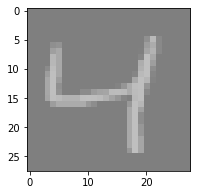

In [27]:
plt.imshow(X_train[2, :, :]/4+127,cmap='gray',vmin=0,vmax=255)

In [28]:
X_train = X_train.reshape(60000,784)

In [29]:
X_test = X_test.reshape(10000,784)

## Normalizar e resolver compatibilidade entre python 2 e 3

In [65]:
X_train.astype('float32')
X_train = X_train /255

In [66]:
X_test.astype('float32')
X_test = X_test /255

In [67]:
from keras.utils import to_categorical

## Para o Keras precisa estar em dummy categorical a variavel de saida

In [68]:
y_train = to_categorical(y_train,10)

In [69]:
y_test = to_categorical(y_test,10)

In [70]:
X_train.shape,y_train.shape

((60000, 784), (60000, 10))

In [71]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Treinar modelo

In [72]:
from sklearn.neural_network import MLPClassifier

In [81]:
model = MLPClassifier(hidden_layer_sizes=(),
                     verbose=True,
                     alpha=0.3,
                     random_state=42)

In [82]:
model.fit(X_train,y_train)

Iteration 1, loss = 2.17868624
Iteration 2, loss = 1.20764202
Iteration 3, loss = 1.04012126
Iteration 4, loss = 0.97245427
Iteration 5, loss = 0.93771958
Iteration 6, loss = 0.91680962
Iteration 7, loss = 0.90297993
Iteration 8, loss = 0.89267518
Iteration 9, loss = 0.88465874
Iteration 10, loss = 0.87792134
Iteration 11, loss = 0.87219171
Iteration 12, loss = 0.86701583
Iteration 13, loss = 0.86236987
Iteration 14, loss = 0.85801238
Iteration 15, loss = 0.85400209
Iteration 16, loss = 0.85058467
Iteration 17, loss = 0.84733627
Iteration 18, loss = 0.84409006
Iteration 19, loss = 0.84112693
Iteration 20, loss = 0.83855347
Iteration 21, loss = 0.83622968
Iteration 22, loss = 0.83355537
Iteration 23, loss = 0.83164702
Iteration 24, loss = 0.82970002
Iteration 25, loss = 0.82792397
Iteration 26, loss = 0.82619057
Iteration 27, loss = 0.82487083
Iteration 28, loss = 0.82315702
Iteration 29, loss = 0.82233927
Iteration 30, loss = 0.82052960
Iteration 31, loss = 0.81999797
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.3, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [84]:
model.score(X_test,y_test)

0.8201

In [85]:
plt.rcParams['figure.figsize'] = 20,20

# Plotar resultado do treino

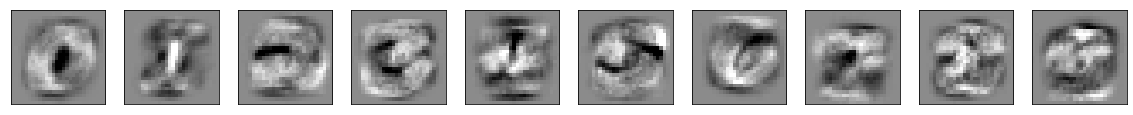

In [86]:
fig,axes = plt.subplots(1,10)
vmin,vmax = model.coefs_[0].min(),model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28,28),
               cmap='gray',
               vmin=0.5*vmin,
               vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())